In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Day 1 
### [RN] January 31st, 3:40 pm 

I read Part I and went to the first group meeting last friday. I will go through the lab manual and answer questions in Part II to start developing my code. 

## The Life Cycle of a Virus
This section primarily serves as background and introduction. 

In [2]:
### Question 1

# get reproduction rate from given
production = 10000    # copies 1 virus generates in given time interval
dt = 0.5     # time interval


# calculate propogation 
V_population = 1    # start with 1 virus
infection_rate = 0.1   # ten percent 
time_elapsed = 0    # c ount time 
C_infected = 0   # number of cells infected starts at zero

while C_infected < 10**12: 
        V_population = V_population * production    # each virus produces 10000 more for each generation 
        C_infected = V_population*infection_rate    # how many cells would be infected total for this many viruses
        time_elapsed = time_elapsed + dt 
        
print("It will take ", time_elapsed, " days to produce enough viruses to infect 1 trillion cells, given that one virus produces ", production, " over ", dt, "days")

It will take  2.0  days to produce enough viruses to infect 1 trillion cells, given that one virus produces  10000  over  0.5 days


In [3]:
### Question 2

transmission = 3 # each person transmits to 3 people
dt = 1 # over one week 

infected_pop = 1 # start with one infected person
time_elapsed = 0
total_time = 4*3 # assuming four weeks in each months, total time is three months 

while time_elapsed <= total_time:
    infected_pop = infected_pop*3 # every person in population spreads to three others
    time_elapsed = time_elapsed + dt # iterate by week 
    
print("After three months, if each person infects three others, there will have been ", infected_pop, " infections total.")

After three months, if each person infects three others, there will have been  1594323  infections total.


## The SIR Model

### Infected
This section explores the number of people infected as a function of time, or I(t). It is important to note that k is the number of people each infected person infects per day. The units of per day are important on k. 

I can already see that this model is a brutal oversimplification of the actual model, but it is a good place to start. The [CDC breaks up the k value](https://www.cdc.gov/coronavirus/2019-ncov/hcp/planning-scenarios.html) (they call it R0) by age group and scenario, taking much more into account like if an individual is asymptomatic or not. I will use that data later to make a better mode. For now we will just look at the most basic model. 

The differential I am working with here is: 

I'(t) = I0 * k 

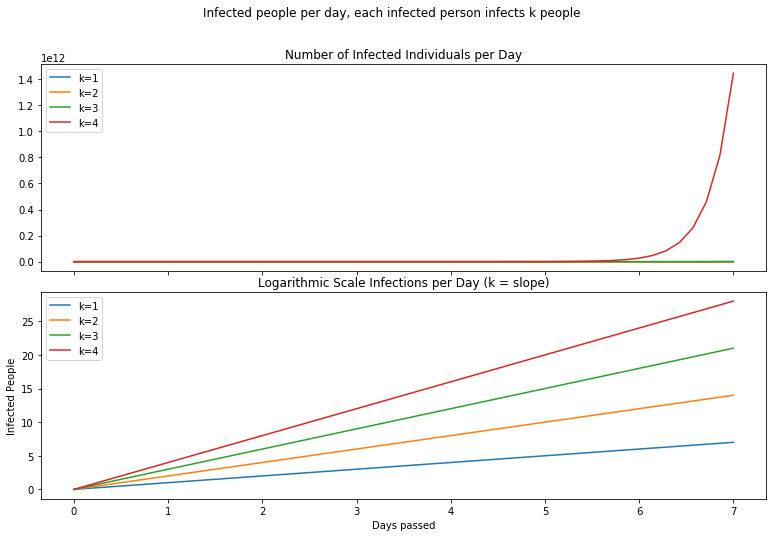

In [4]:
### Question 3
plt.rcParams['figure.figsize'] = [13, 8]
e = (1+(1/(1000000)))**1000000

def Infections_t(k, t, I0):
    It = I0 * e**(k*t)
    return It
days = 7 
t_dat = np.linspace(0, days) # plot time over ten days 

I0 = 1 # start with one infected person 

# Plot linearly
fig1, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace':0.1})
for i in range(1, 5):
    I_dat = np.zeros(len(t_dat))
    I_lndat = np.zeros(len(t_dat))
    k = i
    for j in range(len(t_dat)):
        I_dat[j] = Infections_t(k, t_dat[j], I0)
        I_lndat[j] = math.log(Infections_t(k, t_dat[j], I0))
    axs[0].plot(t_dat, I_dat, label = "k="+str(k))
    slope = (1/days)*(I_lndat[len(I_lndat)-1]-I_lndat[0])
    axs[1].plot(t_dat, I_lndat, label = "k="+str(k))  
plt.xlabel("Days passed")
plt.ylabel("Infected People")
fig1.suptitle("Infected people per day, each infected person infects k people")
axs[0].set_title("Number of Infected Individuals per Day")
axs[1].set_title("Logarithmic Scale Infections per Day (k = slope)")
axs[0].legend()
axs[1].legend()



### [RN] 4:10 pm 
It seems like it will be necessary to include logarithmic plots throughout this project. The linear scale plot shows very little due to the rapid exponential growth. Always having both plots will be complementary and gives more information.

Additionally, as the notebook points out, this model is unrealistic. I only showed one week of infections, but this model does not account for people's recovery and people who have immunity for some reason or another, among other things. The CDC data I found will be much more useful for a real model, but I will come back to that later. 

### Susceptible 

Only S(t) people are actually susceptible at a time in a population of N people. Thus S(0) = N -1, and S(t) = N - I(t). This is important because not every person that an individual comes into contact with will be susceptible. 

The differential for S'(t) is: 

S'(t) = - I'(t) = -k*I(t) 
S(t) = -I(t) = -I0exp(kt))

also: 

I'(t) = k*S(t)*(1/N)*(I(t))

so: 
ln(I(t)) = S0*(k/N)*S(t)

I(t) = S0exp((k/N)*S(t))

Given equation t4, I(t) + S(t) = N at all times because:

I0*N + S0*N*exp(-kt) = N ( I0 + S0*exp(-kt))

The demoninator of equations 4 is ( I0 + S0*exp(-kt)), so for all t, I(t) + S(t) = N

We can see in the code below that I(t) + S(t) is always N

There were  0 instances where S(t) and I(t) did not add up to N. 


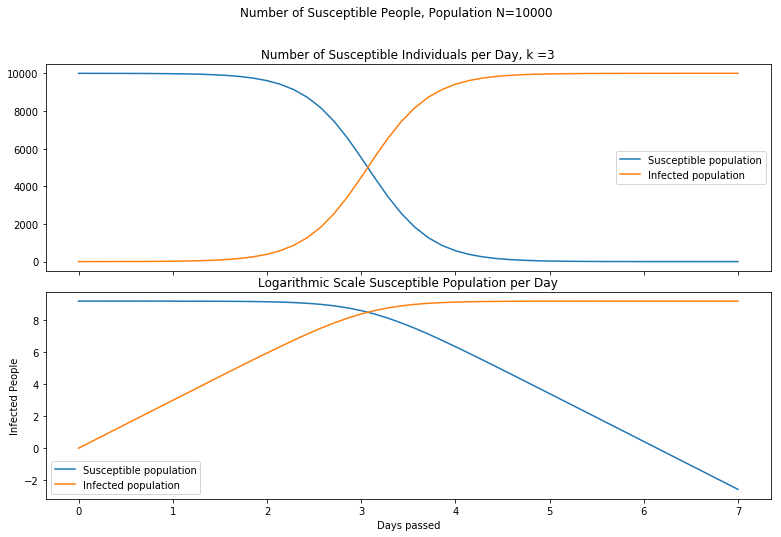

In [5]:
### Question 6

# I need to plot the solution involging S and I 

N = 10000 # set population size 
I0 = 1
S0 = N-I0

# write functions for equation 4
def I_t(I0, S0, k, t, N): 
    top = I0*N
    bottom = I0 + S0*e**(-k*t)
    return top/bottom

def S_t(I0, S0, k, t, N): 
    top = S0*N*e**(-k*t)
    bottom = I0 + S0*e**(-k*t)
    return top/bottom

# Plot 
fig2, axs2 = plt.subplots(2, sharex=True, gridspec_kw={'hspace':0.1})
S_dat, I_dat = np.zeros(len(t_dat)), np.zeros(len(t_dat))
S_lndat, I_lndat = np.zeros(len(t_dat)), np.zeros(len(t_dat))
k = 3
non_N_count = 0 # count any instances where I(t)+S(t) is not N
for j in range(len(t_dat)):     # get data over 7 days for I(t) and S(t)
    S_dat[j] = S_t(I0, S0, k, t_dat[j], N)
    S_lndat[j] = math.log(S_t(I0, S0, k, t_dat[j], N))
    I_dat[j] = I_t(I0, S0, k, t_dat[j], N)
    I_lndat[j] = math.log(I_t(I0, S0, k, t_dat[j], N))
    I_dat[j] = I_t(I0, S0, k, t_dat[j], N)
    if round(S_t(I0, S0, k, t_dat[j], N) + I_t(I0, S0, k, t_dat[j], N)) != N: # check that total is always N
            print("S(t) + I(t) not equal to N!")
            non_N_count = non_N_count + 1
            
# give linear and lograritmically scaled plots 
axs2[0].plot(t_dat, S_dat, label = "Susceptible population")
axs2[0].plot(t_dat, I_dat, label = "Infected population")
slope = (1/days)*(S_lndat[len(S_lndat)-1]-S_lndat[0])
axs2[1].plot(t_dat, S_lndat, label = "Susceptible population")  
axs2[1].plot(t_dat, I_lndat, label = "Infected population")  

plt.xlabel("Days passed")
plt.ylabel("Infected People")
fig2.suptitle("Number of Susceptible People, Population N=" + str(N))
axs2[0].set_title("Number of Susceptible Individuals per Day, k =3")
axs2[1].set_title("Logarithmic Scale Susceptible Population per Day")
axs2[0].legend()
axs2[1].legend()


print("There were ", non_N_count, "instances where S(t) and I(t) did not add up to N. ")

### Removed

Now we need to use R(t) to keep track of removed population. Removal rate us 1/T, with T being the number of days an individual is infectious on average. 

S, I, R add up to N at all times:  True


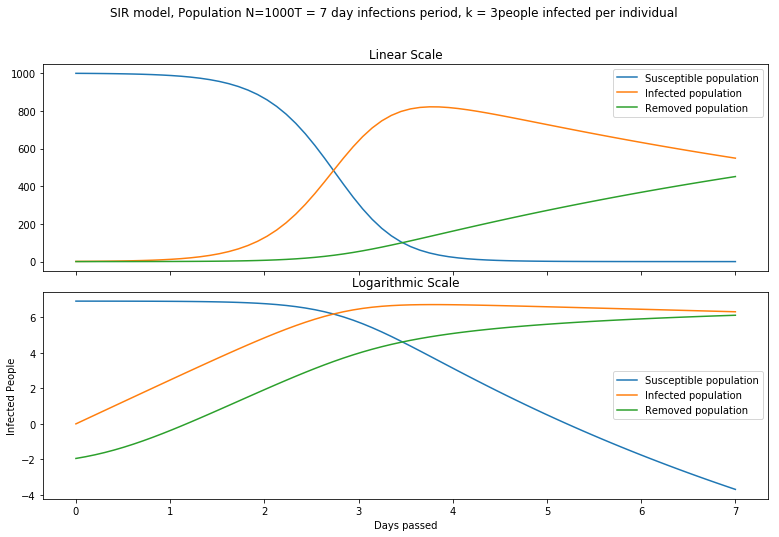

In [7]:
## write a basic SIR function. I will solve by iterating over time steps. 

def SIR_noR0(I0, N, k, T, dt, duration):
    g = float(1/T)
    j = int(duration/dt)
    time_elapsed = 0 # go for duration, iterating by dt
    I, S, R = np.zeros(j), np.zeros(j), np.zeros(j) # i will iterate and fill these in with values 
    R[0] = g*I0 # set initial values as given. 
    I[0] = I0
    S[0] = N-1
    for i in range(1, j): # increment SIR by dt. eg X(t+dt) = X(t) + dX. Log totals in the arrays. 
        dR = g*I[i-1]*dt # get dX values from equation 6
        dI = ((k/N)*S[i-1]*I[i-1]-g*I[i-1])*dt
        dS = -(k/N) * S[i-1]*I[i-1]*dt
        I[i] = I[i-1]+dI  # add increment to last value X(t) to get X(t+dt)
        R[i] = R[i-1]+dR
        S[i] = S[i-1]+dS
    return S, I, R   # return S, I, and R arrays indexed by time. 

# total should always be N. This is good to check, so ill make it a function 
def CheckTotal(S, I, R, N): 
    nonN = 0
    for i in range(len(S)):
        total = S[i] + I[i] + R[i]
        if round(total, 0) != N:
            nonN = nonN+1
    if nonN == 0:
        return True # SIR all add up to N at any given time
    else:
        return False # something went wrong. total is not N. 

def LnData(dat):   # ill be making log graphs often, so ill write a function to convert data 
    lndat = np.zeros(len(dat))
    for i in range(len(dat)):
        lndat[i] = math.log(dat[i])
    return lndat

# define parameters 
N = 1000 # population size 
T = 7 # number of days each person is infectios for
k = 3 # number of people each infections person infects each day 
dt = 0.1 # timestep i want to go by
duration = 7 # number of days i want to model

S, I, R = SIR_noR0(1, N, k, T, dt, duration)
print("S, I, R add up to N at all times: ", CheckTotal(S, I, R, N))

t_dat = np.linspace(0, 7, len(S))
fig3, axs3 = plt.subplots(2, sharex=True, gridspec_kw={'hspace':0.1})

#Plot with linear axes
axs3[0].plot(t_dat, S, label = "Susceptible population")
axs3[0].plot(t_dat, I, label = "Infected population")
axs3[0].plot(t_dat, R, label = "Removed population")
plt.ylabel("Infected People")
# plot with logarithmic axes 
axs3[1].plot(t_dat, LnData(S), label = "Susceptible population")
axs3[1].plot(t_dat, LnData(I), label = "Infected population")
axs3[1].plot(t_dat, LnData(R), label = "Removed population")


plt.xlabel("Days passed")

fig3.suptitle("SIR model, Population N=" + str(N) + "T = "+str(T) + " day infections period, k = "+str(k)+ "people infected per individual")
axs3[0].set_title("Linear Scale")
axs3[1].set_title("Logarithmic Scale")
axs3[0].legend()
axs3[1].legend()

I can see that this model makes much more sense than initial ones. SIR follows conservation laws, as seen by the fact that S, I, and R add up to N at all times (with some deviation corrected by rounding to nearest integer). This model has tons of room for improvement by breaking up demographics with population and CDC published data. I can also use this model to fit real data and study COVID-19 spread in different ways; such as by county, age group, or occupation. 

Issues I still see are the fact that people can get the virus twice after a certain amount of time, introduction of vaccinations, and death rate. 

Next I will modify my function to accomodate the R0 value. 

/Users/rebeccanishide/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in double_scalars
  
/Users/rebeccanishide/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in double_scalars
  from ipykernel import kernelapp as app
/Users/rebeccanishide/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


Text(0.5, 0.98, 'SIR model: Population N=100, I0 = 10 initial people infected, each perseon infects k = 3 others')

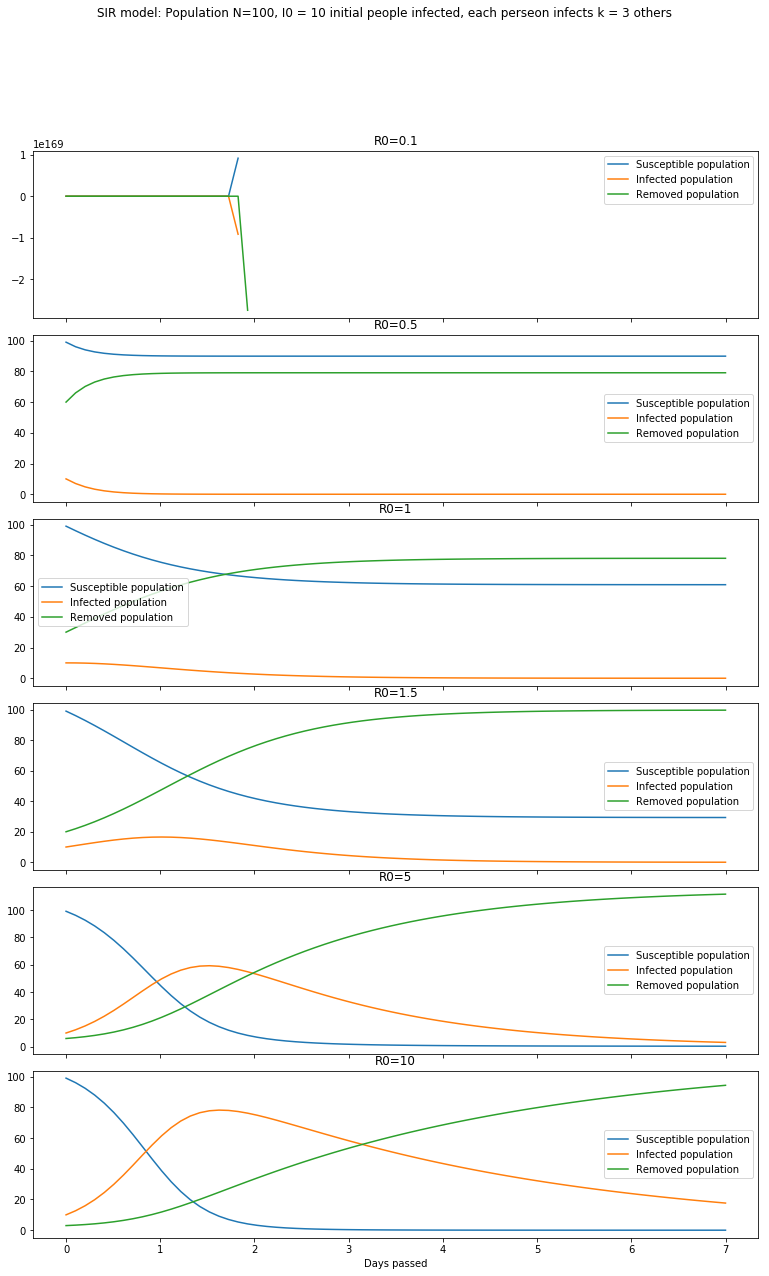

In [20]:
### work in R0 as R0 = k/g

plt.rcParams['figure.figsize'] = [13, 20]
def SIR(I0, N, k, R0, dt, duration):
    g = k/R0
    j = int(duration/dt)
    time_elapsed = 0 # go for duration, iterating by dt
    I, S, R = np.zeros(j), np.zeros(j), np.zeros(j) # i will iterate and fill these in with values 
    R[0] = g*I0 # set initial values as given. 
    I[0] = I0
    S[0] = N-1
    for i in range(1, j): # increment SIR by dt. eg X(t+dt) = X(t) + dX. Log totals in the arrays. 
        dR = g*I[i-1]*dt # get dX values from equation 6
        dI = ((k/N)*S[i-1]*I[i-1]-g*I[i-1])*dt
        dS = -(k/N) * S[i-1]*I[i-1]*dt
        I[i] = I[i-1]+dI  # add increment to last value X(t) to get X(t+dt)
        R[i] = R[i-1]+dR
        S[i] = S[i-1]+dS
    return S, I, R   # return S, I, and R arrays indexed by time. 


t_dat = np.linspace(0, 7, len(S))
plots = 6
fig4, axs4 = plt.subplots(plots, sharex=True, gridspec_kw={'hspace':0.1})
N =100
I0 = 10
R0 = [0.1, 0.5, 1, 1.5, 5, 10]
for i in range(plots):
    S, I, R = SIR(I0, N, k, R0[i], dt, duration)
    axs4[i].plot(t_dat, S, label = "Susceptible population")
    axs4[i].plot(t_dat, I, label = "Infected population")
    axs4[i].plot(t_dat, R, label = "Removed population")
    axs4[i].set_title("R0="+str(R0[i]))
    axs4[i].legend()


plt.xlabel("Days passed")
fig4.suptitle("SIR model: Population N=" + str(N) + ", I0 = "+str(I0) + " initial people infected, each perseon infects k = "+str(k)+ " others")


### [RN] 5:54 pm

I can see that if R0 is less than one, the virus goes away and it is not really an epidemic. The infected population never rises above the number of people initially infected, everyone just gets better. 

The model breaks for very small R0 values, as seen in the first plot where R0 =0.1. The covid-19 pandemic is defintently not behaving like that, so unfortunately this model will work fine and this is not an issue. One observation here is that the lines for S and R do not intersect. 

If R0=1, then the infected population overtime does go down over time, but just barely. The slope of I(t) is negative everywehre, but the maximum number of people are infected for this to still be true. Now the lines for S and R do interesect. 

If R0>1, then the disease spreads and infected population reaches a maximum around where R and S interesct. The epidemic spreads to more of the population when R0>>1 than it does when R0 is just a bit over one. 